In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 有真实划分对比的聚类结果评估

## 1.1 兰德指数(Rand index)
设数据集$X$的一个聚类结构为$C =\{C_1, C_2, \dots, C_s \}$ , 数据集已知的划分为 $P =\{ P_1 , P_2 , \dots, P_r \}$, 
可通过比较$C$和$P$以及邻近矩阵与$P$来评价聚类的质量。对数据集中任一对点$(X_v, X_u)$计算下列项 :
1. `SS`———如果两个点属于$C$中同一簇, 且$P$中同一组;
1. `SD`———如果两个点属于$C$中同一簇, 但$P$中不同组;
1. `DS`———如果两个点不属于$C$中同一簇, 而$P$中属同一组;
1. `DD`———如果两个点不属于$C$中同一簇, 且$P$中不同组。

设$a$、$b$、$c$、$d$ 分别表示`SS`、`SD`、`DS`、`DD` 的数目.
$C$与$P$之间的相似程度可由如下有效性指数定义:

$$\text{RI} = \frac{a + d}{a + b + c +d} = \frac{a + d}{{n \choose 2 }}$$

## 1.2. 调整兰德指数(Adjusted Rand index)

$$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$$

$\text{ARI}$取值范围$[-1,1]$， 取值值越大意味着聚类结果$C$与真实划分$P$越吻合。



构造联列表
$$
\begin{array}{c|cccc|c}
&C_{1}&C_{2}&\cdots &C_{s}&{\text{sums}}\\
\hline 
P_{1}&n_{11}&n_{12}&\cdots &n_{1s}&a_{1}\\
P_{2}&n_{21}&n_{22}&\cdots &n_{2s}&a_{2}\\
\vdots &\vdots &\vdots &\ddots &\vdots &\vdots \\
P_{r}&n_{r1}&n_{r2}&\cdots &n_{rs}&a_{r}\\
\hline {\text{sums}}&b_{1}&b_{2}&\cdots &b_{s}&
\end{array}
$$

其中$n_{ij}=|P_i \cap C_j|$，所属聚类簇和原本划分同组的样本数量

$$
\text{ARI}=\frac{\left.\sum _{ij}{\binom {n_{ij}}{2}}-\left[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}\right]\right/{\binom {n}{2}}}{\left.{\frac {1}{2}}\left[\sum _{i}{\binom {a_{i}}{2}}+\sum _{j}{\binom {b_{j}}{2}}\right]-\left[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}\right]\right/{\binom {n}{2}}}
$$

In [1]:
from sklearn.metrics import adjusted_rand_score

labels_true = [0, 0, 0, 1, 1, 1]

ari_score = adjusted_rand_score(labels_true, [0, 0, 1, 1, 2, 2])
print(f"ARI = {ari_score: 0.4f}")

ARI =  0.2424


聚类结果标签编号与划分的编号无关

In [4]:
ari_score = adjusted_rand_score(labels_true, [1, 1, 0, 0, 3, 3])
print(f"ARI = {ari_score: 0.4f}")

ARI =  0.2424


ARI指数对称性，只关注样本同组或不同组的是否一致。

In [3]:
ari_score = adjusted_rand_score([1, 1, 0, 0, 3, 3], labels_true)
print(f"ARI = {ari_score: 0.4f}")

ARI =  0.2424


聚类结果与数据划分的结果一致

In [5]:
ari_score = adjusted_rand_score([1, 1, 1, 0, 0, 0], labels_true)
print(f"ARI = {ari_score: 0.4f}")

ARI =  1.0000


当1.0说明聚类结果和真是划分一直


聚类结果完全与数据划分不一致时，接近于0或者呈负数

In [6]:
# 独立标签结果为负或者接近 0
labels_true = [0, 0, 0, 0, 1, 1, 1, 1]
labels_pred = [1, 0, 1, 0, 1, 0, 1, 0]
score = adjusted_rand_score(labels_true, labels_pred)
print(score)

-0.16666666666666674


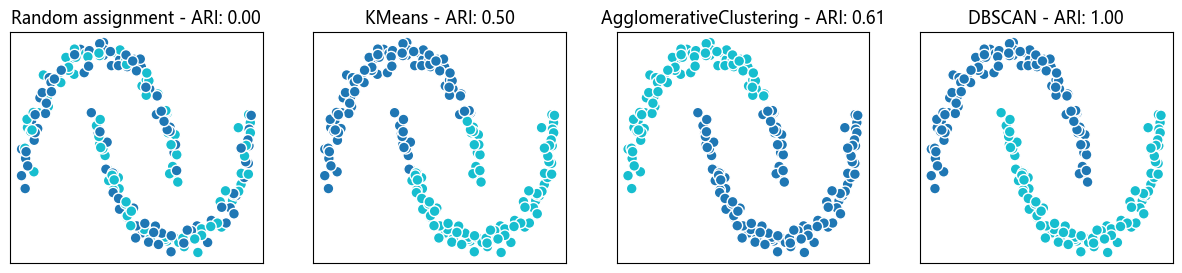

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=plt.cm.tab10, ec="w", s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=plt.cm.tab10, s=60, ec="w")
    class_name = algorithm.__class__.__name__
    ari_score = adjusted_rand_score(y, clusters)
    ax.set_title(f"{class_name} - ARI: {ari_score:.2f}")

分类评价指标`accuracy_score`和聚类评价指标`ARI`的区别

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score


clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

score = accuracy_score(clusters1, clusters2)
print(f"Accuracy: {score :0.2f}")

score = adjusted_rand_score(clusters1, clusters2)
print(f"     ARI: {score :0.2f}")

Accuracy: 0.00
     ARI: 1.00


# 2. 无真实划分的聚类结果评估

样本$i$的轮廓系数（Silhouette Coefficient）结合了聚类的凝聚度（Cohesion）和分离度（Separation），评估聚类的效果。

轮廓系数取值范围$[-1,~1]$之间，值越大，表示聚类效果越好。具体计算方法如下：

1. 样本点$x_i$，计算$x_i$与其同一个簇内的所有其他元素距离的平均值，记作$a_i$，用于量化簇内的**凝聚度**。
2. 选取$x_i$外的一个簇$b$，计算$x_i$到$b$中所有点的平均距离。
依次遍历所有其他簇，找到最近的这个平均距离，记作$b_i$，量化簇之间**分离度**。

对于样本$x_i$，其轮廓系数
$$
s_i = \frac{b_i – a_i}{\max(a_i, b_i)}
$$

<CENTER>
    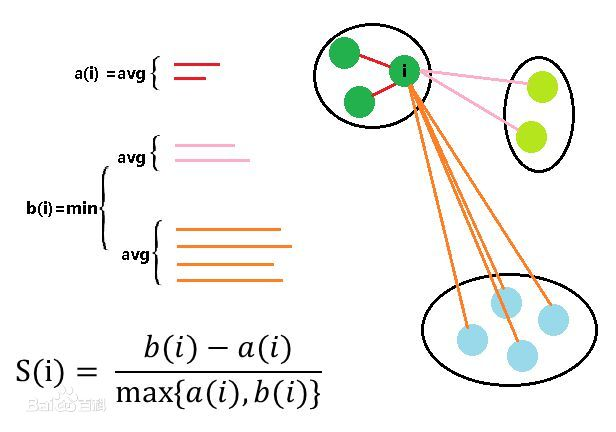
</CENTER>

> 若$s_i$小于$0$，说明$x_i$与其簇内元素的平均距离小于最近的其他簇，表示聚类效果不好。
> 
> 如果$a_i$趋于$0$，或者$b_i$足够大，那么$s_i$趋近与$1$，说明聚类效果比较好。


聚类的整体轮廓系数，样本轮廓系数的均值
$$
s = \frac{1}{n}\sum_i \frac{b_i – a_i}{\max(a_i, b_i)}
$$





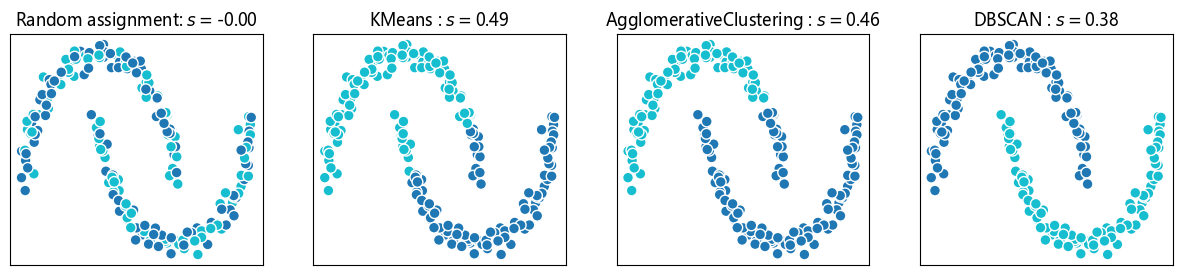

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

#  产生随机聚类结果
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1],  c=random_clusters, cmap=plt.cm.tab10, s=60, ec="w")
score = silhouette_score(X_scaled, random_clusters)
axes[0].set_title(f"Random assignment: $s=${score:.2f}")

algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=plt.cm.tab10, s=60, ec="w")
    class_name = algorithm.__class__.__name__
    score = silhouette_score(X_scaled, clusters)
    ax.set_title(f"{class_name} : $s=${score :.2f}")

In [10]:
def plot_silhouette(ax1, X, cluster_labels, n_clusters):
    
    sample_values = silhouette_samples(X, cluster_labels) # 计算每个样本的轮廓系数
    silhouette_avg = silhouette_score(X, cluster_labels) # 所有样本轮廓系数均值

    ax1.set_xlim(xmin=min(-0.1, np.min(sample_values) - 0.1 ), xmax=1.0)

    groups = []
    for label in np.unique(cluster_labels):
        # 簇内样本的轮廓系数，从小到大排序
        cluster_values = sample_values[cluster_labels == label]
        cluster_values.sort()
        groups.append((label, cluster_values)) 
    
    # 簇按照簇内样本轮廓系数均值从小到大排序
    groups = sorted(groups, key=lambda g: np.mean(g[1])) 
        
    y_lower = 10
    for i, cluster_values  in groups:
        size_cluster_i = cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(i / n_clusters) # 每簇的颜色
        ax1.fill_betweenx(np.arange(y_lower, y_upper), x1=0, x2=cluster_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 簇与簇之间间隔10

    
    ax1.set_title(f"Silhouette={silhouette_avg:0.2f}")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])

    # 轮廓系数均线
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

In [85]:
def plot_kmeans_silhouette(X, n_clusters):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5), dpi=100)

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    ax = axes[0]
    plot_silhouette(ax, X, cluster_labels, n_clusters)
    ax.set_xlim(-0.3,1)
    
    ax = axes[1]
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(X[:, 0], X[:, 1], marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # 绘制聚类中心点
    centers = clusterer.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor='k')

    ax.set_xlabel("1st feature")
    ax.set_ylabel("2nd feature")

    fig.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  f"with n_clusters = {n_clusters}"),
                 fontsize=14, fontweight='bold')


In [49]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

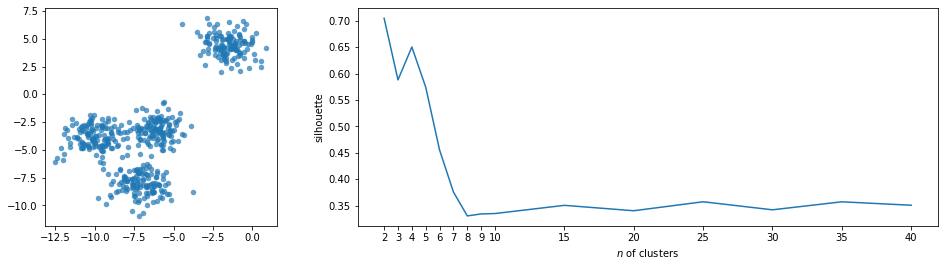

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

trials_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]
scores = []
for n_clusters in trials_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, clusters))
    
fig, axes = plt.subplots(1,2, figsize=(16,4), gridspec_kw={'width_ratios': [1, 2.5]})
# fig.tight_layout()
ax = axes[0]
ax.scatter(X[:,0], X[:,1], marker='o', s=30, lw=0, alpha=0.7, edgecolor='k')
ax = axes[1]
ax.plot(trials_n_clusters, scores)
ticks = np.r_[np.arange(2, 10), np.arange(2,9)*5]
ax.set_xticks(ticks); ax.set_xticklabels(ticks);
ax.set_ylabel("silhouette"); ax.set_xlabel("$n$ of clusters");

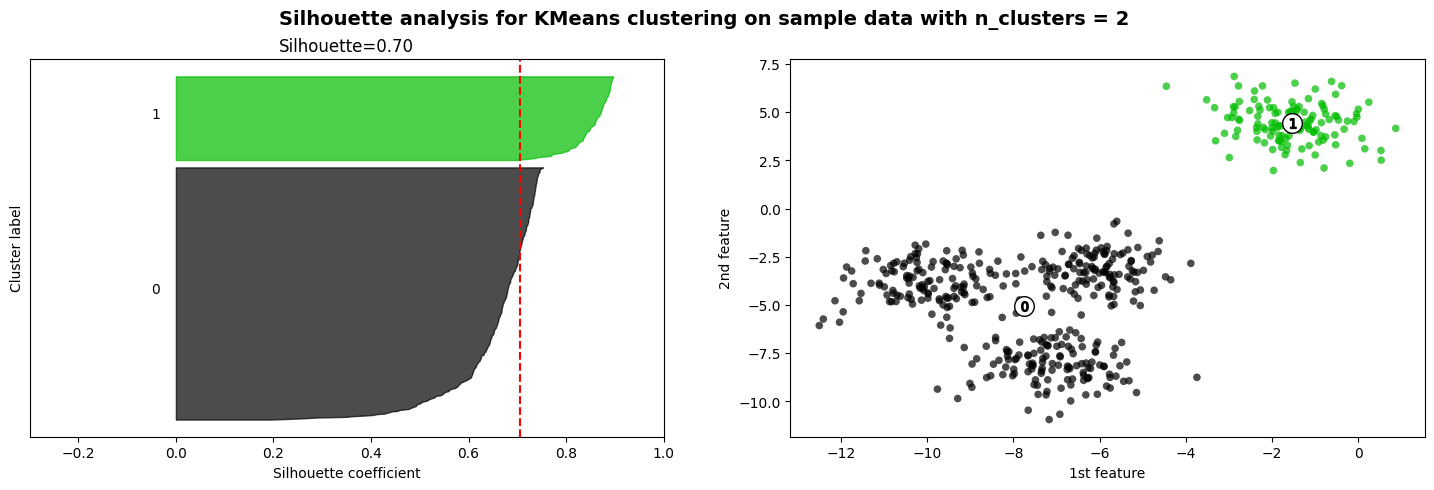

In [86]:
plot_kmeans_silhouette(X, 2)

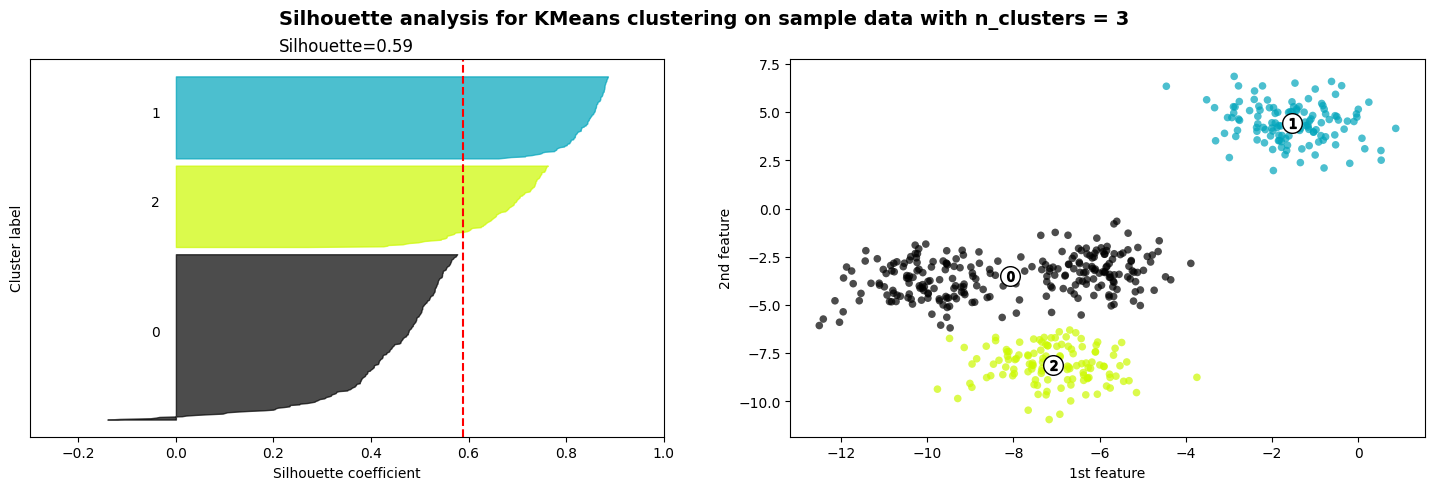

In [87]:
plot_kmeans_silhouette(X, n_clusters=3)

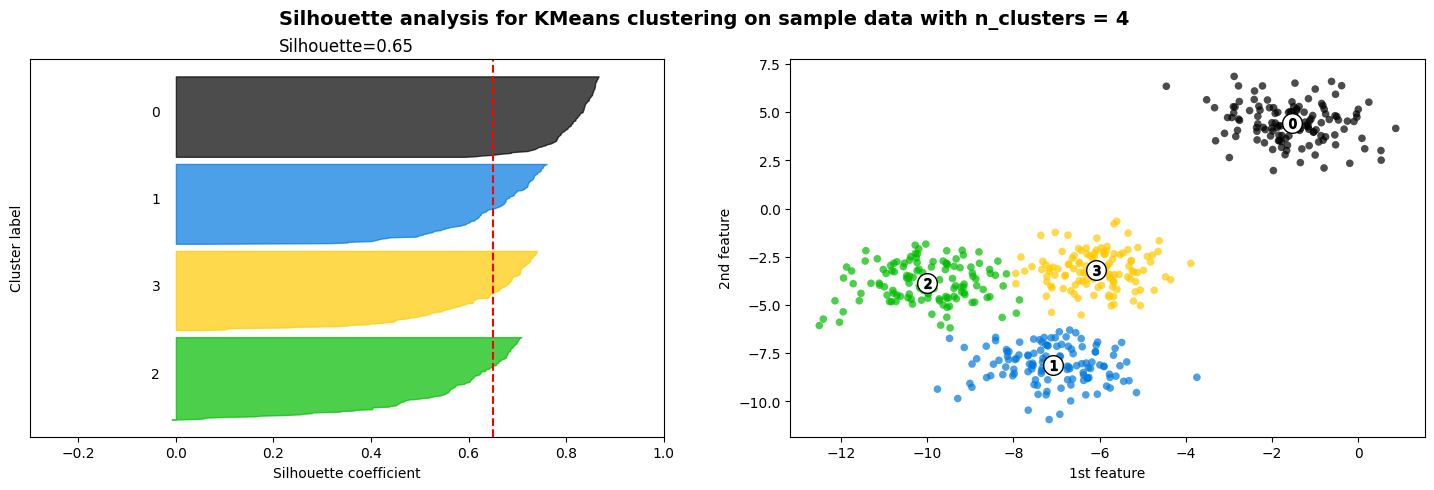

In [88]:
plot_kmeans_silhouette(X, n_clusters=4)

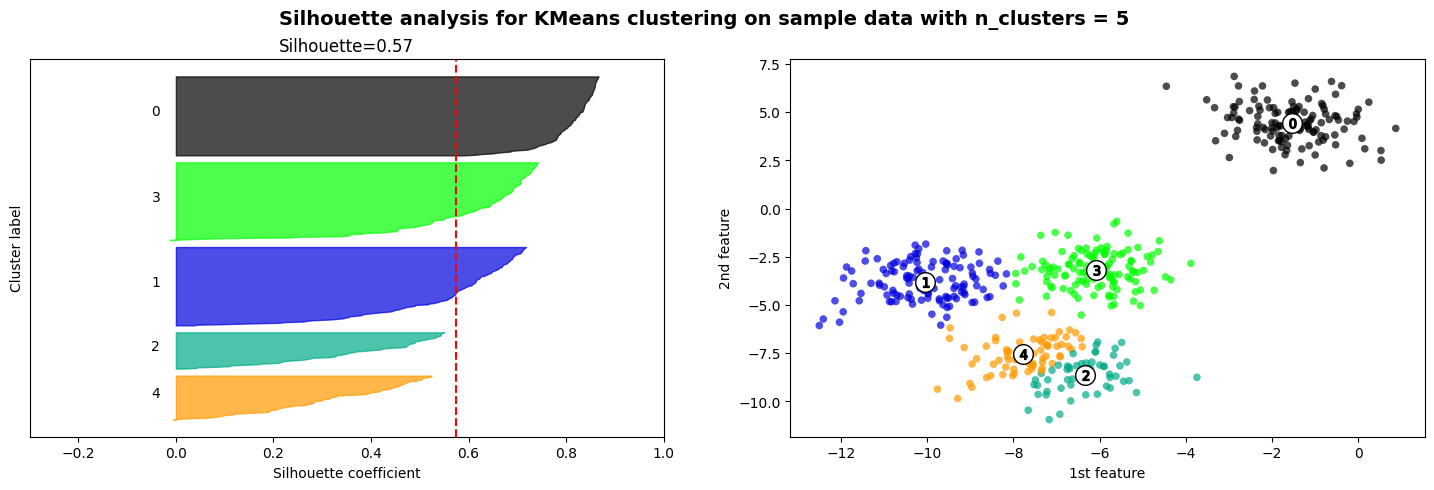

In [89]:
plot_kmeans_silhouette(X, n_clusters=5)

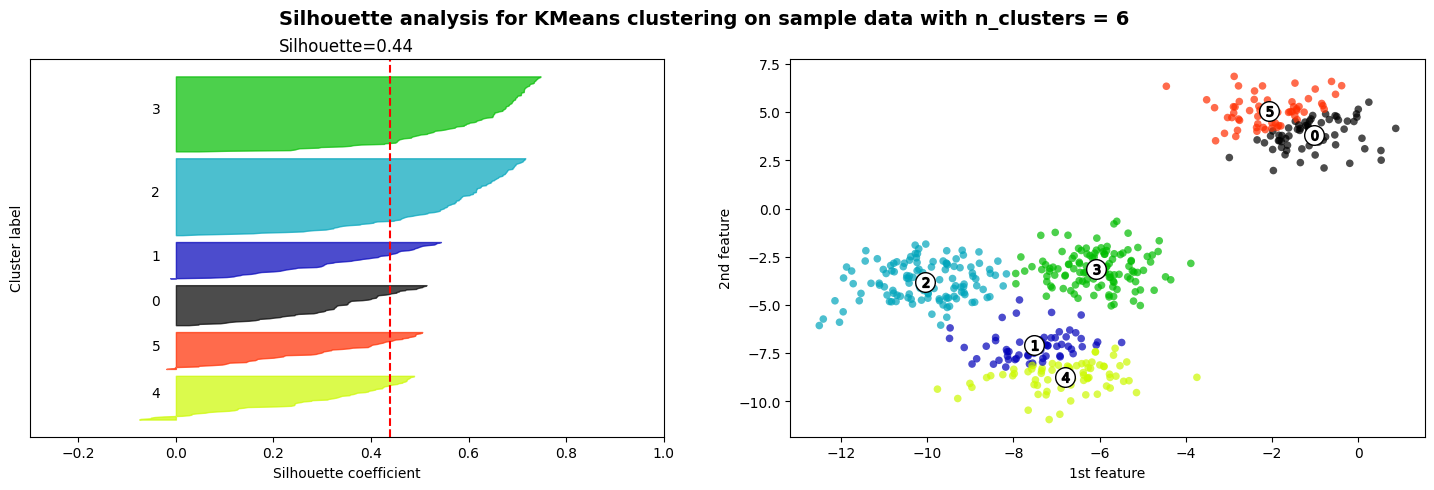

In [90]:
plot_kmeans_silhouette(X, n_clusters=6)

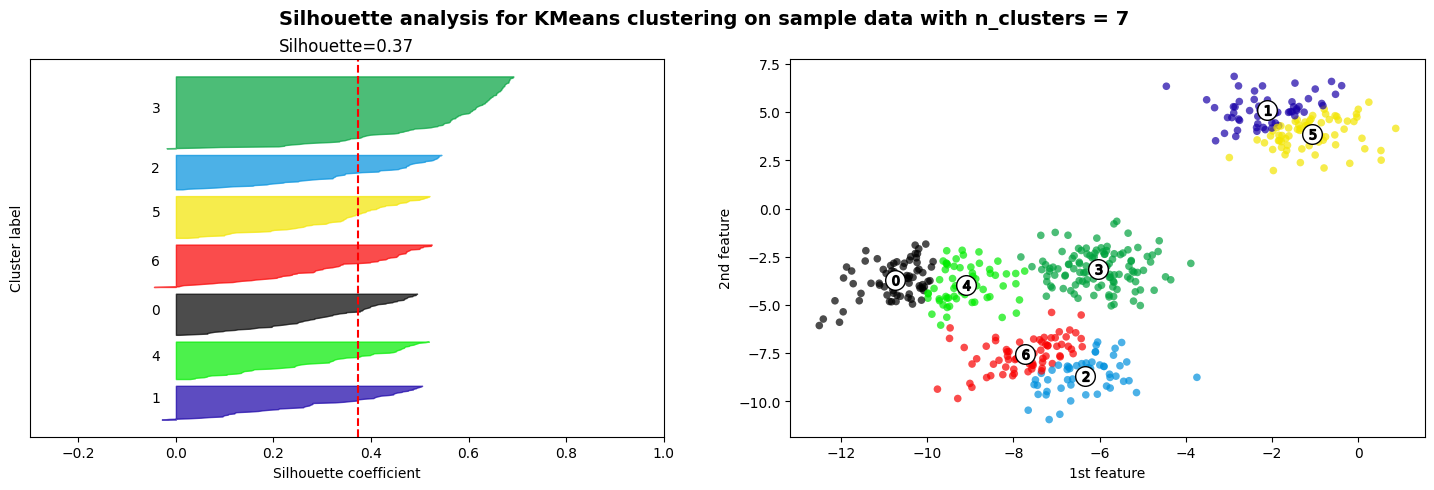

In [91]:
plot_kmeans_silhouette(X, n_clusters=7)

### IRIS聚类

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [17]:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(y, kmeans.labels_)
print(f"ARI = {ari_score: 0.4f}")

ARI =  0.5399


In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)